In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv
/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import zscore


from transformers import pipeline
from transformers import BertTokenizer
import re

In [7]:
df1='/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv'

In [8]:
df=pd.read_csv(df1)

In [9]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [10]:
exclude_column = ['credit_risk_score','device_os','source','housing_status','employment_status','payment_type']
for col in df.columns:
    if col not in exclude_column:
        df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)

In [11]:
df.head()


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,NaN,25.0,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0
1,0,0.8,0.617426,NaN,89.0,20,0.010095,NaN,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0
2,0,0.8,0.996707,9.0,14.0,40,0.012316,NaN,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0
3,0,0.6,0.475100,11.0,14.0,30,0.006991,NaN,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0,0
4,0,0.9,0.842307,NaN,29.0,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1.0,0,0


In [12]:
df = df[~((df['bank_months_count'].isna()) & (df['fraud_bool'] == 0))]

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import zscore


from transformers import pipeline
from transformers import BertTokenizer
import re

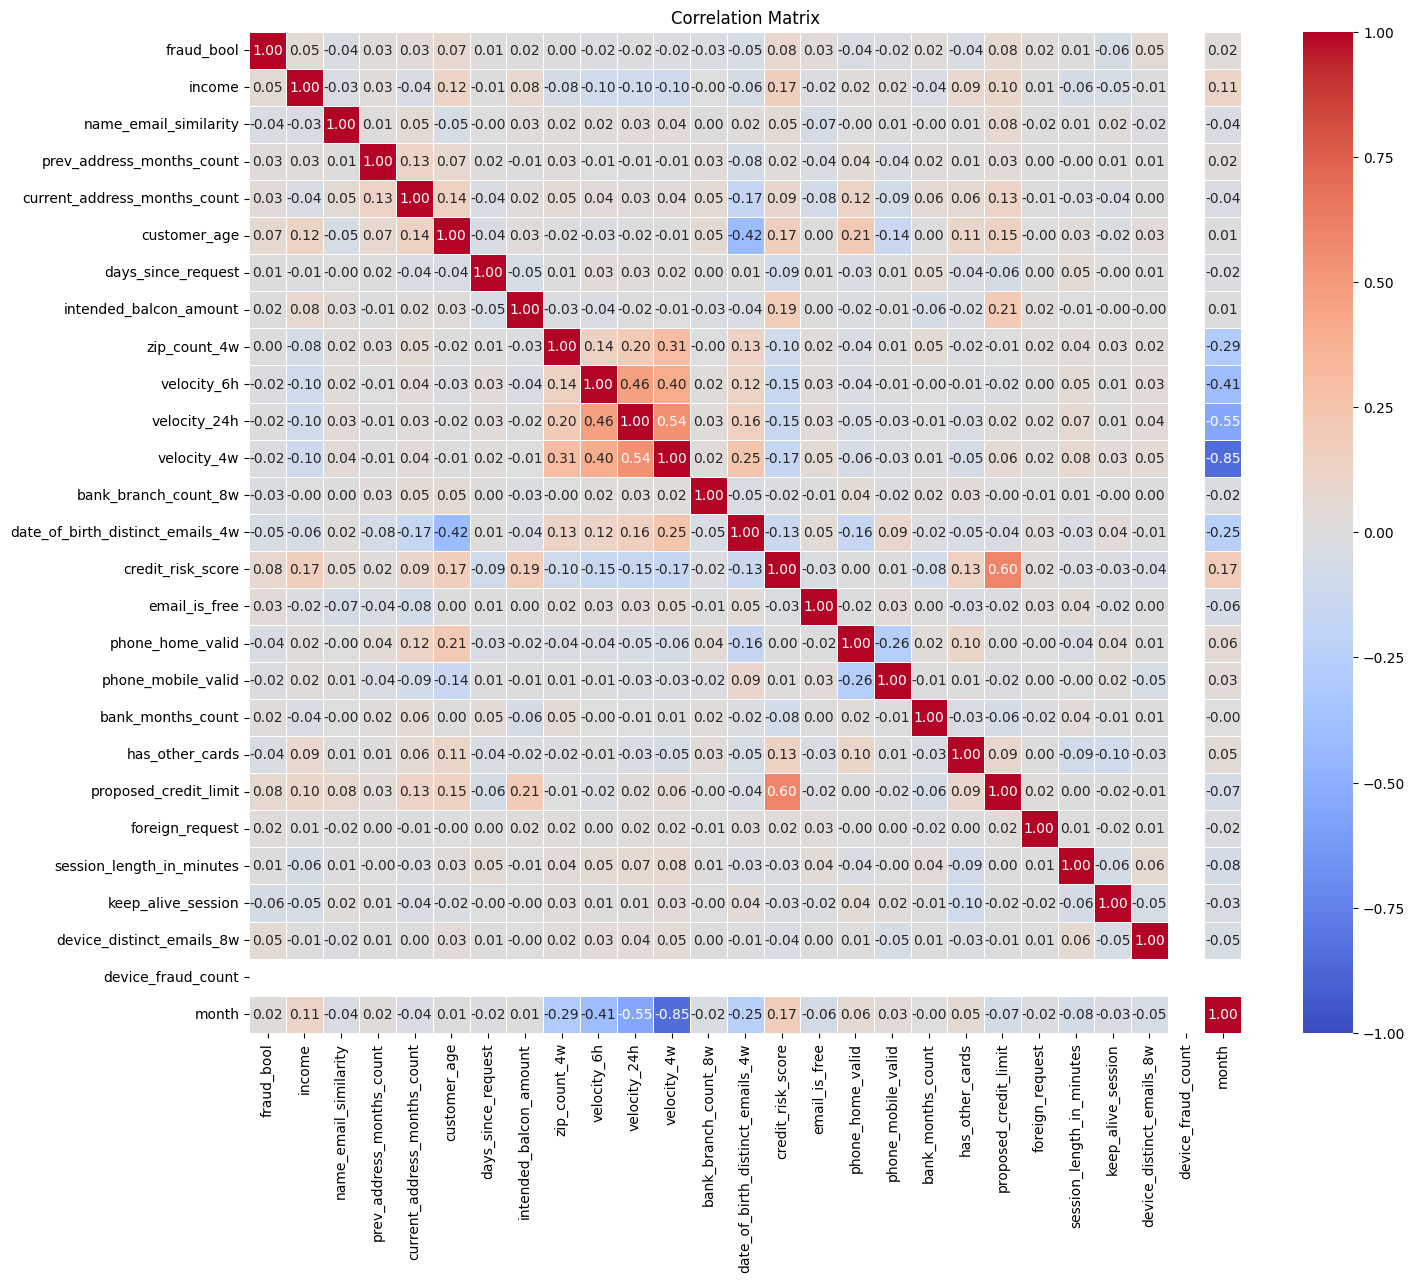

In [14]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 13))  # Adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [15]:
df.drop(columns=['prev_address_months_count','intended_balcon_amount'], inplace=True)

In [16]:
df.isnull().sum()

fraud_bool                             0
income                                 0
name_email_similarity                  0
current_address_months_count        3156
customer_age                           0
days_since_request                     0
payment_type                           0
zip_count_4w                           0
velocity_6h                           42
velocity_24h                           0
velocity_4w                            0
bank_branch_count_8w                   0
date_of_birth_distinct_emails_4w       0
employment_status                      0
credit_risk_score                      0
email_is_free                          0
housing_status                         0
phone_home_valid                       0
phone_mobile_valid                     0
bank_months_count                   4140
has_other_cards                        0
proposed_credit_limit                  0
foreign_request                        0
source                                 0
session_length_i

In [17]:
df = df[~((df['session_length_in_minutes'].isna()) & (df['fraud_bool'] == 0))]

In [18]:
df = df[~((df['bank_months_count'].isna()) & (df['fraud_bool'] == 0))]

In [19]:
df = df[~((df['velocity_6h'].isna()) & (df['fraud_bool'] == 0))]

In [20]:
df= df[~((df['device_distinct_emails_8w'].isna()) & (df['fraud_bool'] == 0))]

In [21]:
count=((df['bank_months_count'].isna()) & (df['fraud_bool'] == 1)).sum()
print(count) ##toutes les valeurs nulles correspond a une fraude !!!!!!

4140


In [22]:
df.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,25.0,40,0.006735,AA,1059,13096.035018,7850.955007,...,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0
1,0,0.8,0.617426,89.0,20,0.010095,AD,1658,9223.283431,5745.251481,...,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0
2,0,0.8,0.996707,14.0,40,0.012316,AB,1095,4471.472149,5471.988958,...,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0
3,0,0.6,0.475100,14.0,30,0.006991,AB,3483,14431.993621,6755.344479,...,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0,0
4,0,0.9,0.842307,29.0,40,5.742626,AA,2339,7601.511579,5124.046930,...,0,200.0,0,INTERNET,3.743048,other,0,1.0,0,0


In [23]:
colonnes_avec_nan = df.columns[df.isna().any()].tolist()

print("Colonnes contenant des valeurs NaN :", colonnes_avec_nan)

Colonnes contenant des valeurs NaN : ['current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [34]:
df.fillna(0, inplace=True)

In [35]:
df = df.apply(pd.to_numeric, errors='coerce')

In [36]:
dfb = df
dfb['email_is_free'] = dfb['email_is_free'].astype('category')
dfb['phone_home_valid'] = dfb['phone_home_valid'].astype('category')
dfb['phone_mobile_valid'] = dfb['phone_mobile_valid'].astype('category')
dfb['has_other_cards'] = dfb['has_other_cards'].astype('category')
dfb['foreign_request'] = dfb['foreign_request'].astype('category')
dfb['keep_alive_session'] = dfb['keep_alive_session'].astype('category')

In [38]:
categorical_columns = dfb.select_dtypes(include=['object', 'category']).columns
numerical_columns = dfb.select_dtypes(include=['number']).columns
dfb.drop(columns=['device_fraud_count'], inplace=True)
numerical_columns = dfb.select_dtypes(include=['number']).columns

In [39]:
dfb_encoded = pd.get_dummies(dfb, categorical_columns)

In [40]:
X = dfb_encoded.drop('fraud_bool', axis=1)  # Variables indépendantes
y = dfb_encoded['fraud_bool']  # Cible

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
X = X_resampled
y = y_resampled

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Définir les paramètres à tester
param_grid = {
    'C': [1, 10],       # Valeurs possibles pour C
    'gamma': ['auto']  # Valeurs possibles pour gamma
}

In [48]:
classifierSVMrbf = SVC(kernel='rbf')

In [49]:
# Appliquer GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=classifierSVMrbf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)

In [ ]:
grid_result = grid_search.fit(X_train, y_train)

In [50]:
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_:.2f}")

Best Parameters: {'C': 10, 'gamma': 'auto'}
Best Score: 0.84


In [52]:
print("\nFinal Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
               precision recall    f1-score  support   
0              0.98      0.99      0.98      147718    
1              0.99      0.81      0.89      147718    

accuracy       0.98      
macro avg      0.98      0.90      0.94      295436    
weighted avg   0.98      0.90      0.94      295436    


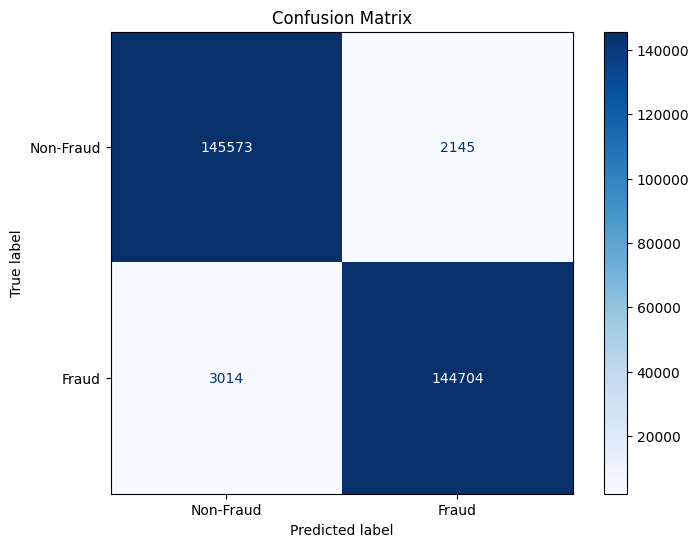

In [53]:
# Génération de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
disp.ax_.set_title("Matrice de confusion SVM")
plot.show()